# Experiment no: 3 (Decision Tree Classifier and Random Forest Classifier)
## Sarvesh Vikas Tikekar (2022120037)

### Decision Tree Classifier Implementation

In [474]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [475]:
"""Importing all the libraries """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

filterwarnings('ignore')

In [476]:
"""Dataset Link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set"""

data = pd.read_csv('/content/drive/MyDrive/CSL701-Machine-Learning/Datasets/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [477]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [478]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


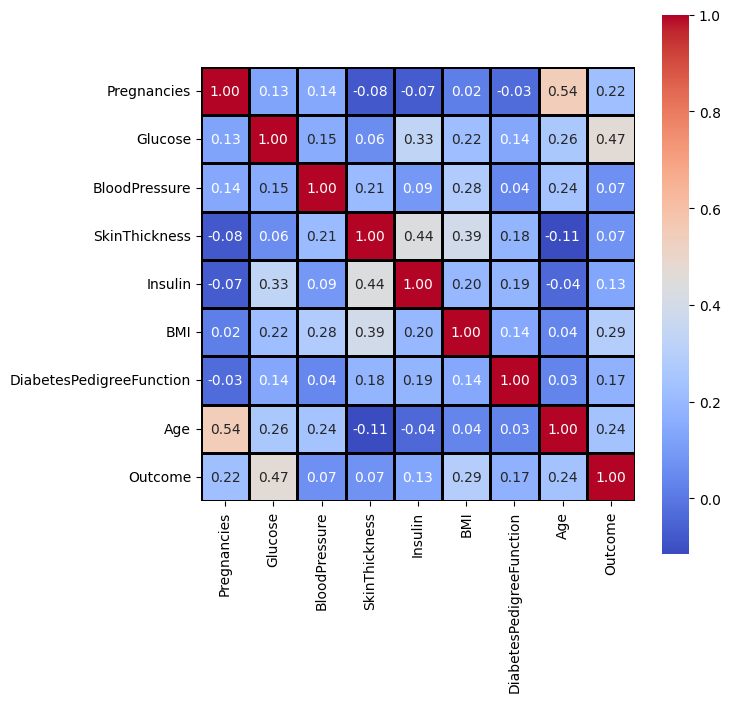

In [479]:
""" Plotting a correlation heatmap to find out which features are less correlated to class """

corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm', square=True, fmt='.2f', linecolor='black')
plt.show()

In [480]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Accuracy is: 79.22077922077922


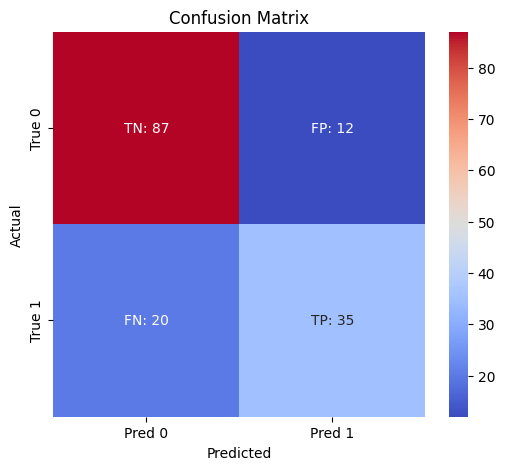

In [481]:
""" First Model using all features """

X = data.drop(columns=['Outcome'])
Y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {acc_score*100}")

conf = confusion_matrix(y_test, y_pred)
labels = np.asarray([['TN', 'FP'], ['FN', 'TP']])

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        annot[i,j] = f"{labels[i,j]}: {conf[i,j]}"

plt.figure(figsize=(6,5))

sns.heatmap(conf, annot=annot, cmap='coolwarm', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'], fmt='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy is: 78.57142857142857


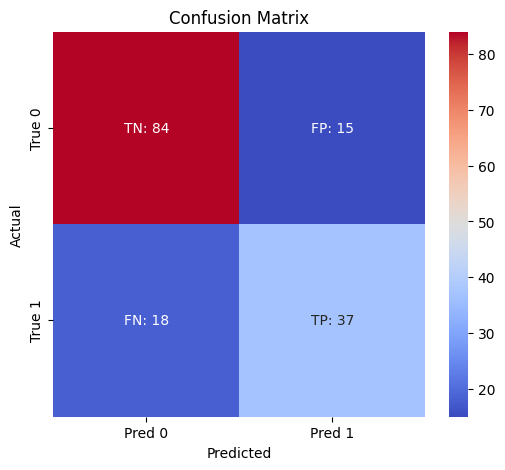

In [482]:
""" Second Model using only correlated features """

data2 = data
data2 = data2.drop(columns=['BloodPressure', 'SkinThickness'])

X = data2.drop(columns=['Outcome'])
Y = data2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print(f"Accuracy is: {acc_score * 100}")
conf = confusion_matrix(y_test, y_pred)
labels = np.asarray([['TN', 'FP'], ['FN', 'TP']])

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        annot[i,j] = f"{labels[i,j]}: {conf[i,j]}"

plt.figure(figsize=(6,5))

sns.heatmap(conf, annot=annot, cmap='coolwarm', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'], fmt='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

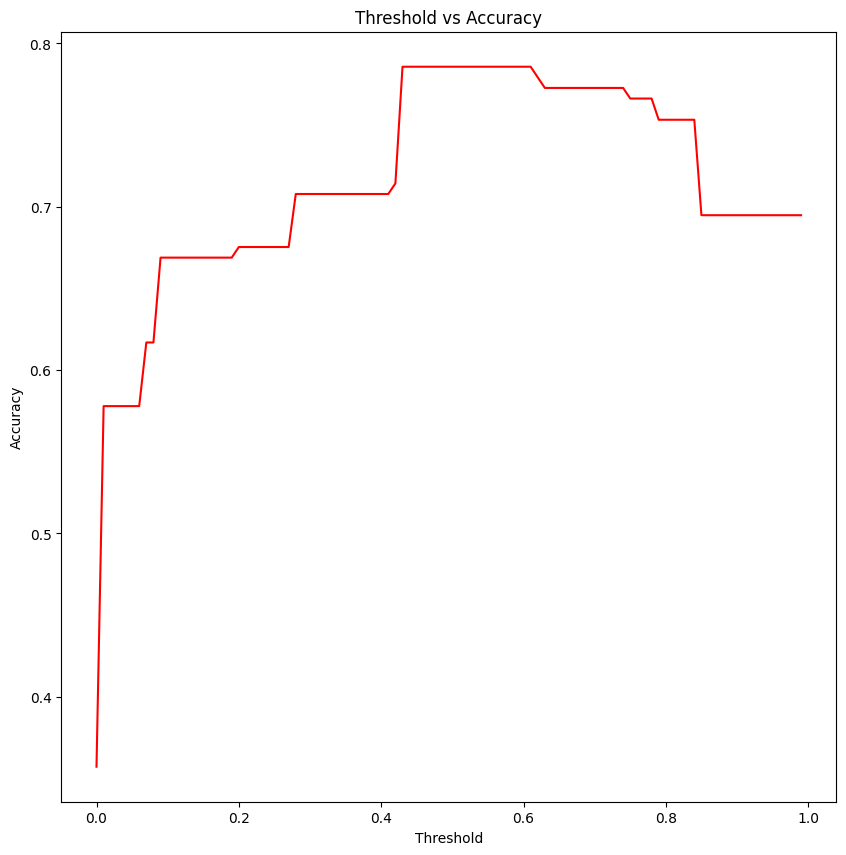

In [483]:
""" Plotting the thresholds to analyze the relation between accuracy and threshold and what is the peak which is achieved """

threshold = 0
incremental_rate = 0.01

acc_list = list()
thresh_list = list()

y_pred_proba = model.predict_proba(X_test)[:, 1]

while threshold <= 1:

    y_pred = (y_pred_proba >= threshold).astype(int)
    acc_score = accuracy_score(y_test, y_pred)

    acc_list.append(acc_score)
    thresh_list.append(threshold)
    threshold += incremental_rate

plt.figure(figsize=(10, 10))
plt.plot(thresh_list, acc_list, color='red')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [484]:
data2['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Accuracy of fold: 1 is: 0.7077922077922078
Accuracy of fold: 2 is: 0.7207792207792207
Accuracy of fold: 3 is: 0.7077922077922078
Accuracy of fold: 4 is: 0.6928104575163399
Accuracy of fold: 5 is: 0.6601307189542484


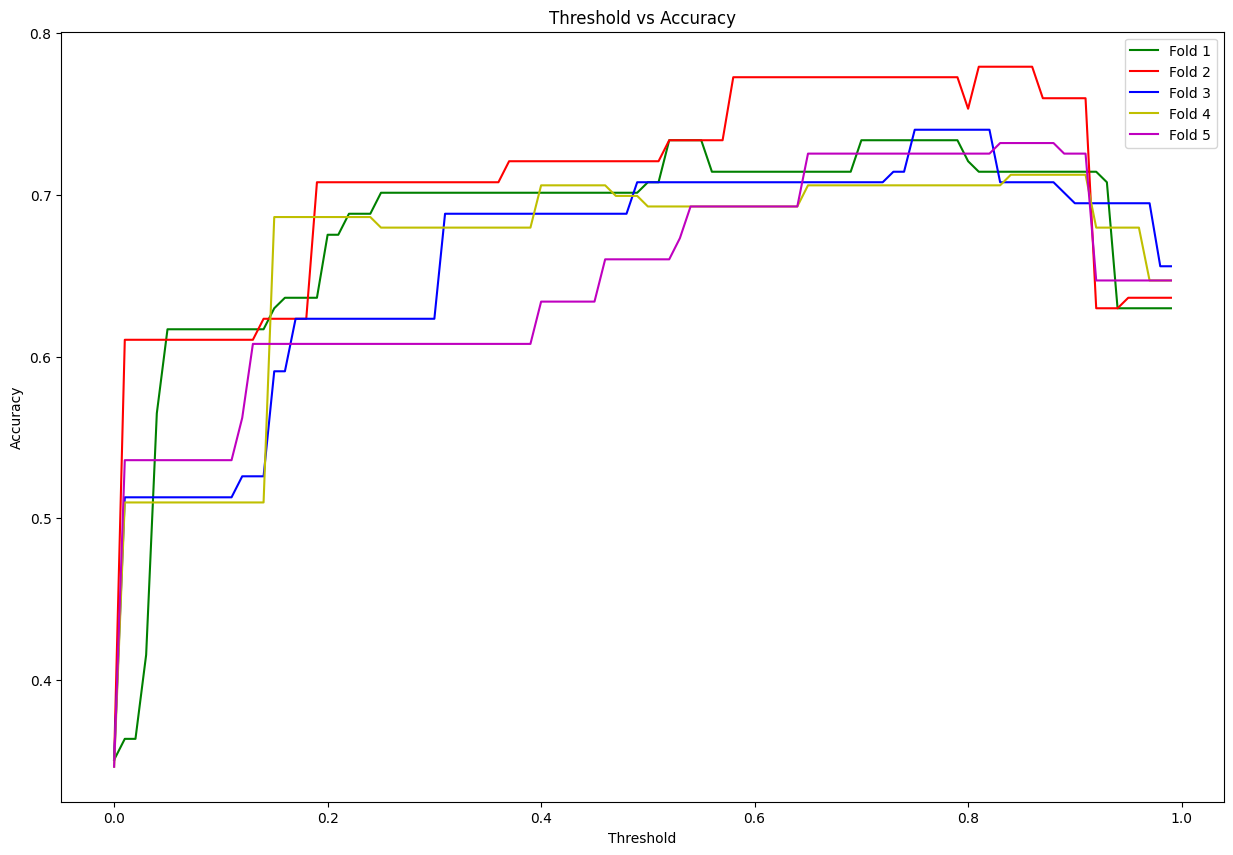

In [485]:
"""Synthetic Minority Oversampling Technique (Smote) for balancing both classes in the training and testing """

smote = SMOTE(sampling_strategy='minority', random_state=42)

""" Third Model using correlated features + stratified k-fold + smote """

X = data2.drop(columns=['Outcome'])
y = data2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

fold_threshes = []
fold_accuracy = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  X_train, y_train = smote.fit_resample(X_train, y_train)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)

  print(f"Accuracy of fold: {fold} is: {acc_score}")

  threshold = 0
  incremental_rate = 0.01

  acc_list = list()
  thresh_list = list()

  y_pred_proba = model.predict_proba(X_test)[:, 1]

  while threshold <= 1:

    y_pred = (y_pred_proba >= threshold).astype(int)
    acc_score = accuracy_score(y_test, y_pred)

    acc_list.append(acc_score)
    thresh_list.append(threshold)
    threshold += incremental_rate

  fold_threshes.append(thresh_list)
  fold_accuracy.append(acc_list)

""" Plotting threshold vs accuracy graph for all the folds """

plt.figure(figsize=(15, 10))
plt.plot(fold_threshes[0], fold_accuracy[0], color='g')
plt.plot(fold_threshes[1], fold_accuracy[1], color='r')
plt.plot(fold_threshes[2], fold_accuracy[2], color='b')
plt.plot(fold_threshes[3], fold_accuracy[3], color='y')
plt.plot(fold_threshes[4], fold_accuracy[4], color='m')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])

plt.show()

## Random Forest Classifier Implementation

Accuracy score is: 0.7272727272727273


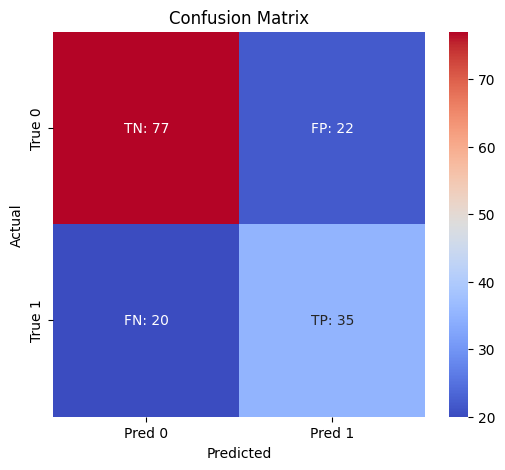

In [486]:
""" First model on original dataframe """

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
)

forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy score is: {acc_score}")

conf = confusion_matrix(y_test, y_pred)
labels = np.asarray([['TN', 'FP'], ['FN', 'TP']])

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        annot[i,j] = f"{labels[i,j]}: {conf[i,j]}"

plt.figure(figsize=(6,5))

sns.heatmap(conf, annot=annot, cmap='coolwarm', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'], fmt='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

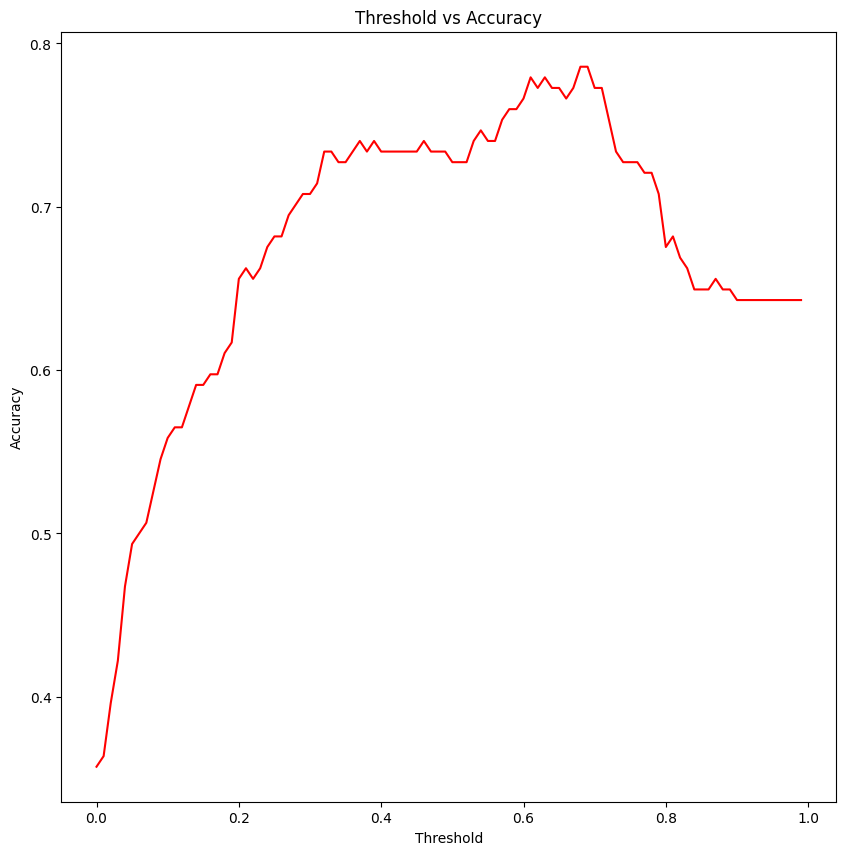

In [487]:
""" Threshold graph for above model """

threshold = 0
incremental_rate = 0.01

acc_list = list()
thresh_list = list()

y_pred_proba = forest_model.predict_proba(X_test)[:, 1]

while threshold <= 1:

    y_pred = (y_pred_proba >= threshold).astype(int)
    acc_score = accuracy_score(y_test, y_pred)

    acc_list.append(acc_score)
    thresh_list.append(threshold)
    threshold += incremental_rate

plt.figure(figsize=(10, 10))
plt.plot(thresh_list, acc_list, color='red')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

Accuracy of fold: 1 is: 0.7727272727272727
Accuracy of fold: 2 is: 0.7857142857142857
Accuracy of fold: 3 is: 0.7337662337662337
Accuracy of fold: 4 is: 0.7450980392156863
Accuracy of fold: 5 is: 0.6862745098039216


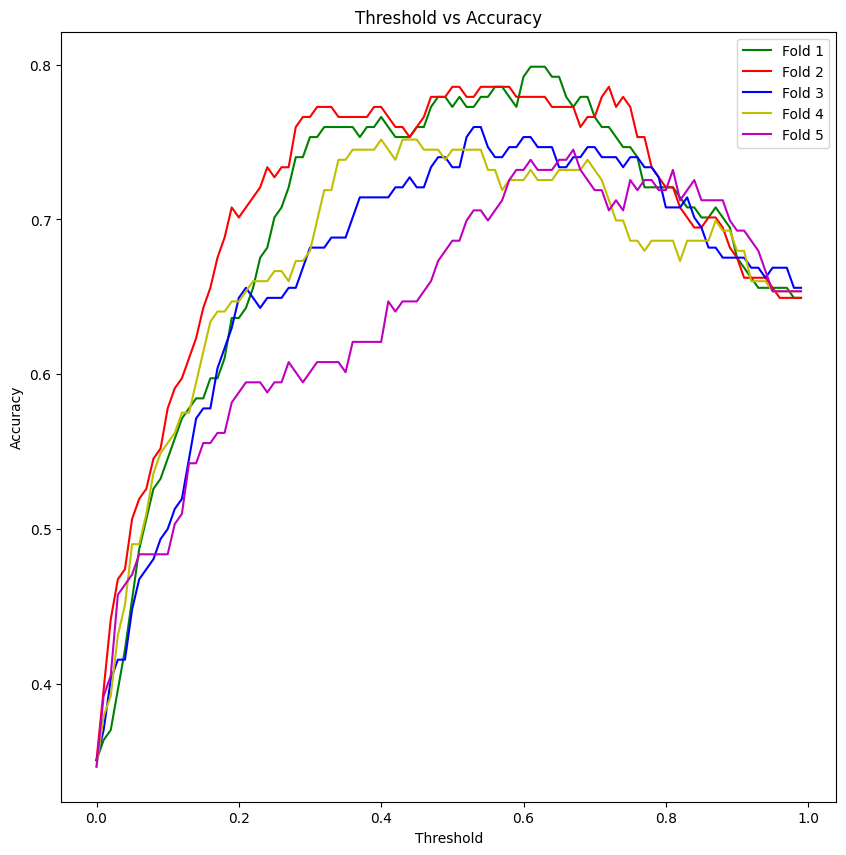

In [488]:
""" Third Model using correlated features + Stratified k-fold """

X = data2.drop(columns=['Outcome'])
y = data2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

fold_threshes = []
fold_accuracy = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  X_train, y_train = smote.fit_resample(X_train, y_train)

  forest_model.fit(X_train, y_train)

  y_pred = forest_model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)

  print(f"Accuracy of fold: {fold} is: {acc_score}")

  threshold = 0
  incremental_rate = 0.01

  acc_list = list()
  thresh_list = list()

  y_pred_proba = forest_model.predict_proba(X_test)[:, 1]

  while threshold <= 1:

    y_pred = (y_pred_proba >= threshold).astype(int)
    acc_score = accuracy_score(y_test, y_pred)

    acc_list.append(acc_score)
    thresh_list.append(threshold)
    threshold += incremental_rate

  fold_threshes.append(thresh_list)
  fold_accuracy.append(acc_list)

""" Plotting threshold vs accuracy graph for all the folds """

plt.figure(figsize=(10, 10))
plt.plot(fold_threshes[0], fold_accuracy[0], color='g')
plt.plot(fold_threshes[1], fold_accuracy[1], color='r')
plt.plot(fold_threshes[2], fold_accuracy[2], color='b')
plt.plot(fold_threshes[3], fold_accuracy[3], color='y')
plt.plot(fold_threshes[4], fold_accuracy[4], color='m')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])

plt.show()